<a href="https://colab.research.google.com/github/katieliu2024/katieliu2024/blob/main/Assignment3_Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

TA: Amirhossein Babaei Ravandi (amir.babaei@mail.utoronto.ca)

## Part 1: Data Loading and Exploration


This assignment will guide you through the process of implementing logistic regression on a dataset to predict a binary outcome.
You'll start by loading and exploring the data, followed by cleaning and preparing the data for modeling.
You'll then build, evaluate, and optimize a logistic regression model, and finally, you'll interpret the results and discuss your findings.


In [24]:
# Import the necessary libraries for data processing and machine learning.

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# sklearn libraries for preprocessing, model selection, and metrics
from sklearn.preprocessing import StandardScaler  # To standardize features
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.model_selection import KFold  # For K-fold cross-validation
from sklearn.metrics import make_scorer, confusion_matrix  # For creating custom metrics and confusion matrices
from sklearn.model_selection import learning_curve  # To generate a learning curve

# Libraries for visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For attractive and informative statistical graphics

sns.set_style('whitegrid')  # Set the style of seaborn plots to 'whitegrid'

# This command makes sure that plots are displayed inline in the Jupyter Notebook.
%matplotlib inline



**Q1: Loading the Dataset**
Load the Pima Indians Diabetes dataset using pandas.
Display the first 10 rows of the dataset.


In [12]:
df = pd.read_csv('/content/drive/My Drive/INF1340/Sources/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



**Q2: Descriptive Statistics**
Use pandas to display a summary of statistics for the numerical columns.


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



**Q3: Initial Data Insights**
Write down three insights you can gather from the descriptive statistics.


<font color='red'>Your Answer Here</font>

insights 1: the csv file collect data of age range from 21 until 81. The range is widely spread. This suggest that the file focus on adult information (above 21). The quartiles (25%, 50%,75%) show a gradual increase in age. 75% of individual under 41 years old.

insight 2: the mean of BMI is 31.99 and the median of the BMI is 32 (50% percentile). The mean and median is almost the same. This suggest that the BMI data is symmetric distributed. There is no significant skewness on BMI data.

insight 3: the mean of the blood pressure is 69.1 and the median of the blood pressure is 72 (0% percentile). The median is greater than mean. Therefore, there is skewness towards the left. The higher standard deviation of 19 suggest that blood pressure values are dispersed around the mean. There is a high variability.


**Q3.1:**
Given the presence of zero values in clinical measurements where zero is not feasible (like 'Glucose', 'BloodPressure', etc.), how would you approach the preprocessing of this dataset to make it suitable for building a reliable logistic regression model? Discuss the potential methods and their implications on model performance


<font color='red'>Your Answer Here</font>
method 1 imputations: we can replace zero values with mean or median within that specific feature. implication: biased estimation. However, this may underestimate variability and distort relationships.

method 2: model-based imputation
we can use predictive models (such as decision trees or regressions) to predic missing values based on other features in the dataset.
implication: However, this may increased the complexity of the mofel.

## Part 2: Data Cleaning


**Q4: Handling Missing Values**
Identify any missing values in the dataset. Replace '0' values with `NaN` in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns.



In [70]:
#Identify any missing values in the dataset. Glucose
df[df['Glucose'].isnull()]
#The result shows that there is no missing values in Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [69]:
#Identify any missing values in the dataset. Glucose
df[df['BloodPressure'].isnull()]
#The result shows that there is no missing values in Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.30,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.00,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.20,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.90,0.773,25,0
193,11,135.0,NaN,NaN,NaN,50.25,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.20,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.00,0.761,27,1


In [67]:
#Identify any missing values in the dataset. Glucose
df[df['SkinThickness'].isnull()]
#The result shows that there is no missing values in Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0


In [68]:
#Identify any missing values in the dataset. Glucose
df[df['Insulin'].isnull()]
#The result shows that there is no missing values in Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [71]:
#Identify any missing values in the dataset. Glucose
df[df['BMI'].isnull()]
#The result shows that there is no missing values in Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


**Q4.1** Fill in missing values


In [96]:
df['Glucose'].fillna(0, inplace=True)

In [95]:
df['Glucose'].fillna(0, inplace=True)

In [94]:
df['SkinThickness'].fillna(0, inplace=True)

In [93]:
df['Insulin'].fillna(0, inplace=True)

In [91]:
df['BMI'].fillna(0, inplace=True)


**Q5: Correcting Data Types**
Check the data types of each column using the `dtypes` attribute.


In [23]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**Q5.1**: Imagine that you have a column representing the number of times a patient has been hospitalized, and it's incorrectly typed as a floating-point. What would be the appropriate data type for this column, and why? Write the code to convert this column to the correct data type.

<font color='red'>Your Answer Here</font>

for a column representing the number of times a patient has been hospitalized, the appropriate data type should be integer (int). It is because hospitalization counts are typically whole numbers and don't require decimal precision.

Code:

df['Hospitalization_Count'] = df['Hospitalization_Count'].astype(int)


**Q6: Outlier Detection and Handling**
Plot boxplots for the 'Insulin' and 'BMI' columns to visualize outliers.


Text(0.5, 1.0, 'Boxplot for Insulin')

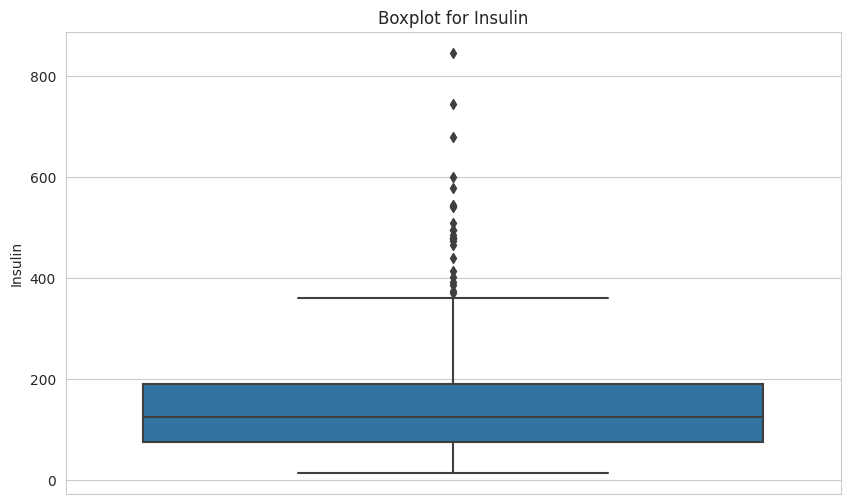

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Insulin', data=df)
plt.title('Boxplot for Insulin')

Text(0.5, 1.0, 'Boxplot for BMI')

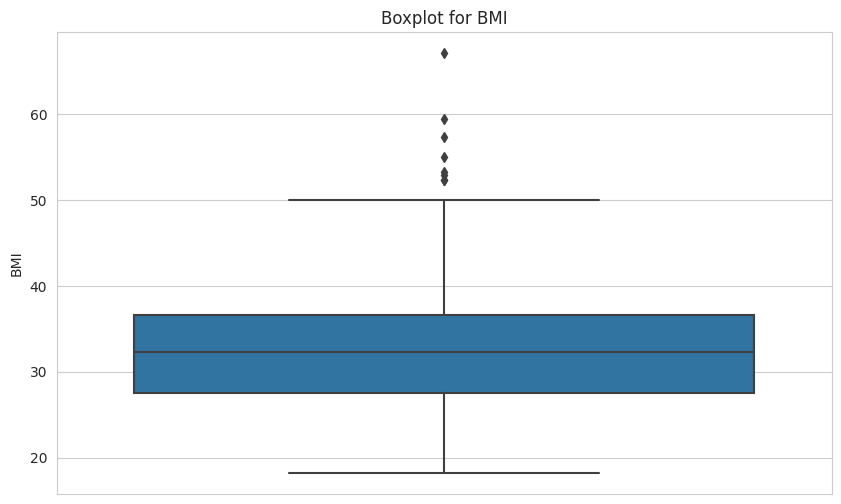

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(y='BMI', data=df)
plt.title('Boxplot for BMI')

**Q6.1** Is there any outlier? Briefly explain.

<font color='red'>Your Answer Here</font>

Yes, there is outlier in both of the columns BMI and Insulin. Based on the boxplot, the outliers are the points beyond the whiskers. In the BMI, there are points above 50 are the outliers. In the Insulin, the points above around 380 are the outliers.

**Q6.2: Handling Outliers**

Capping is a method used to limit the range of variable values, thus reducing the effect of outliers. It involves defining a lower and an upper threshold, often based on the interquartile range (IQR). Values that fall below or above this range are replaced with the threshold values. This method preserves the bulk of the data while minimizing the impact of extreme values.

The process generally involves the following steps:

Calculate the first quartile (Q1) and the third quartile (Q3) of the data.
Compute the IQR, which is the difference between Q3 and Q1.
Determine the lower bound as Q1 minus 1.5 times the IQR.
Determine the upper bound as Q3 plus 1.5 times the IQR.
Replace values below the lower bound with the lower bound value, and values above the upper bound with the upper bound value.


**Performs capping for the 'Insulin' and 'BMI' columns**

In [32]:
#capping for the BMI
Q1_B = df['BMI'].quantile(0.25)
Q3_B = df['BMI'].quantile(0.75)
IQR_B = Q3_B - Q1_B
lower_bound_B = Q1_B - 1.5 * IQR_B
upper_bound_B = Q3_B + 1.5 * IQR_B
df.loc[df['BMI'] < lower_bound_B, 'BMI'] = lower_bound_B
df.loc[df['BMI'] > upper_bound_B, 'BMI'] = upper_bound_B

In [34]:
#capping for the Insulin
Q1_I = df['Insulin'].quantile(0.25)
Q3_I = df['Insulin'].quantile(0.75)
IQR_I = Q3_I - Q1_I
lower_bound_I = Q1_I - 1.5 * IQR_I
upper_bound_I = Q3_I + 1.5 * IQR_I
df.loc[df['Insulin'] < lower_bound_I, 'Insulin'] = lower_bound_I
df.loc[df['Insulin'] > upper_bound_I, 'Insulin'] = upper_bound_I

## Part 3: Data Visualization


**Q7: Histograms for Feature Distribution**
Create histograms for 'Glucose', 'BloodPressure', 'BMI', and 'Age'.


Text(0.5, 1.0, 'Histogram of Glucose')

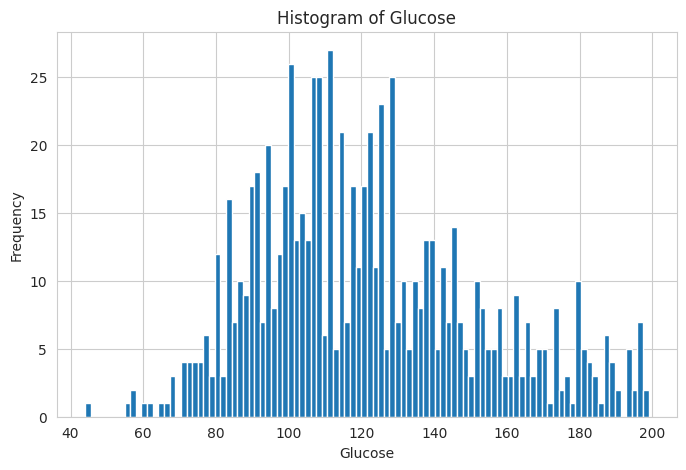

In [35]:
#histogram for Glucose
fig, ax = plt.subplots(figsize=(8, 5))
df['Glucose'].hist(bins=100, ax=ax)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose')

Text(0.5, 1.0, 'Histogram of BloodPressure')

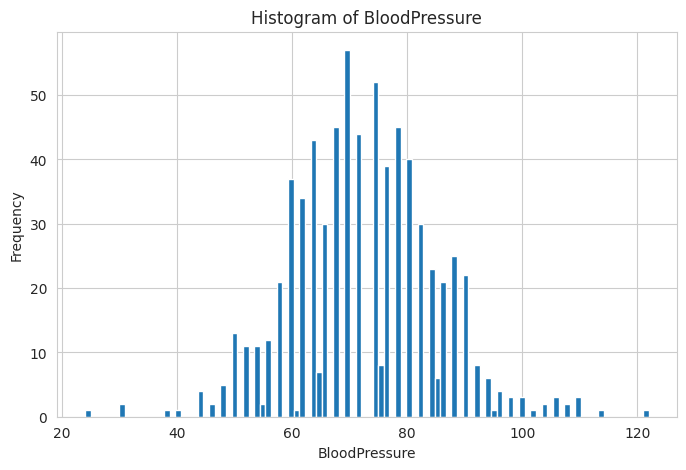

In [36]:
#histogram for BloodPressure
fig, ax = plt.subplots(figsize=(8, 5))
df['BloodPressure'].hist(bins=100, ax=ax)
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('Histogram of BloodPressure')

Text(0.5, 1.0, 'Histogram of BMI')

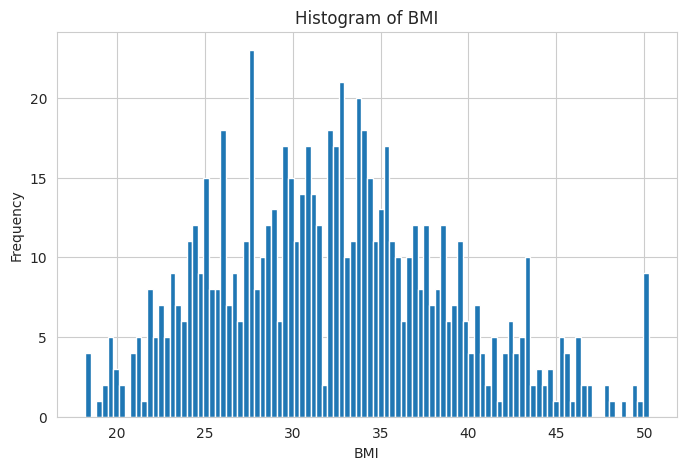

In [37]:
#histogram for BMI
fig, ax = plt.subplots(figsize=(8, 5))
df['BMI'].hist(bins=100, ax=ax)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

Text(0.5, 1.0, 'Histogram of Age')

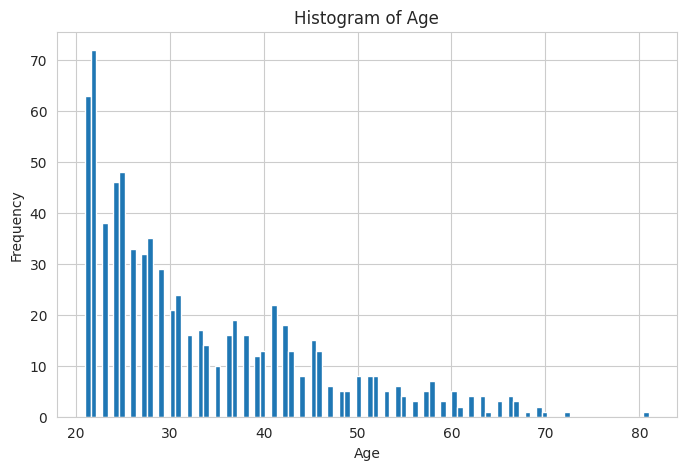

In [38]:
#histogram for Age
fig, ax = plt.subplots(figsize=(8, 5))
df['Age'].hist(bins=100, ax=ax)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')


**Q8: Boxplots for Outcome Comparison**
Generate boxplots for 'Insulin' and 'DiabetesPedigreeFunction', separated by the 'Outcome' variable.


<Axes: xlabel='Outcome', ylabel='Insulin'>

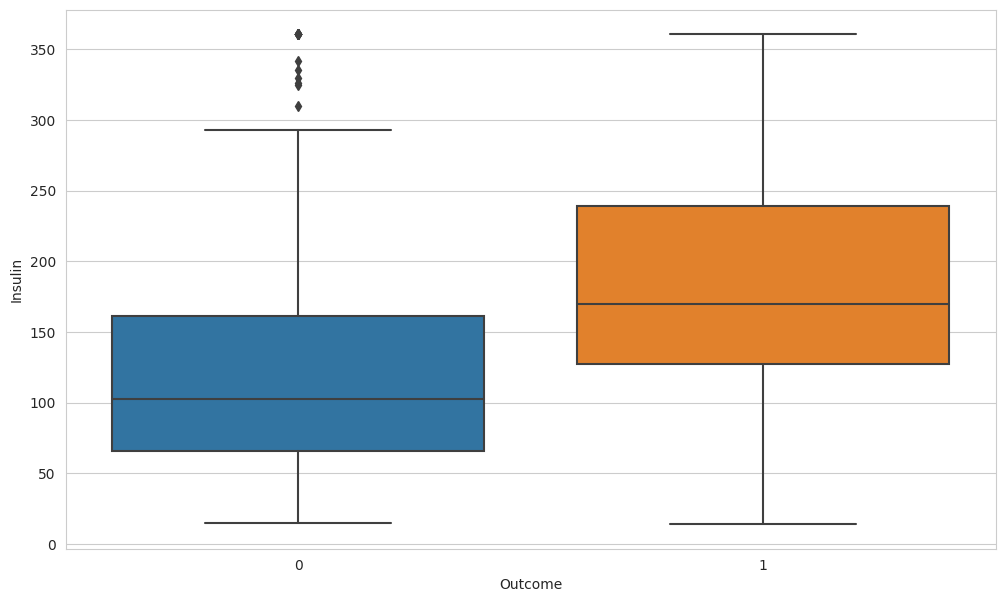

In [39]:
# Boxplot for Insulin
plt.figure(figsize=(12,7))
sns.boxplot(x='Outcome', y='Insulin', data=df)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

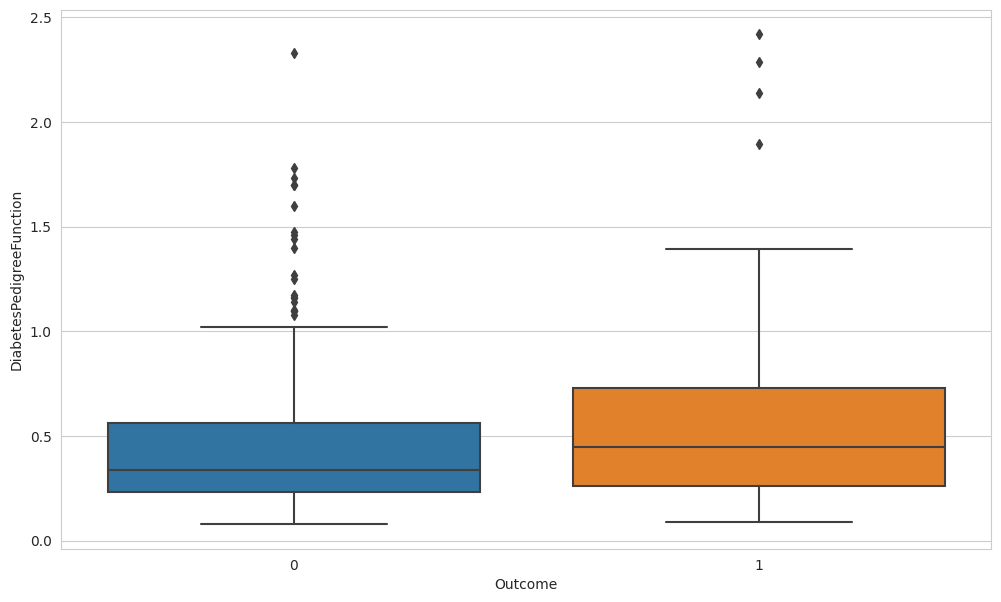

In [40]:
# Boxplot for DiabetesPedigreeFunction
plt.figure(figsize=(12,7))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)


**Q9: Pair Plot for Variable Relationships**
Create a pair plot for 'Glucose', 'BMI', 'Age', and 'Insulin'.


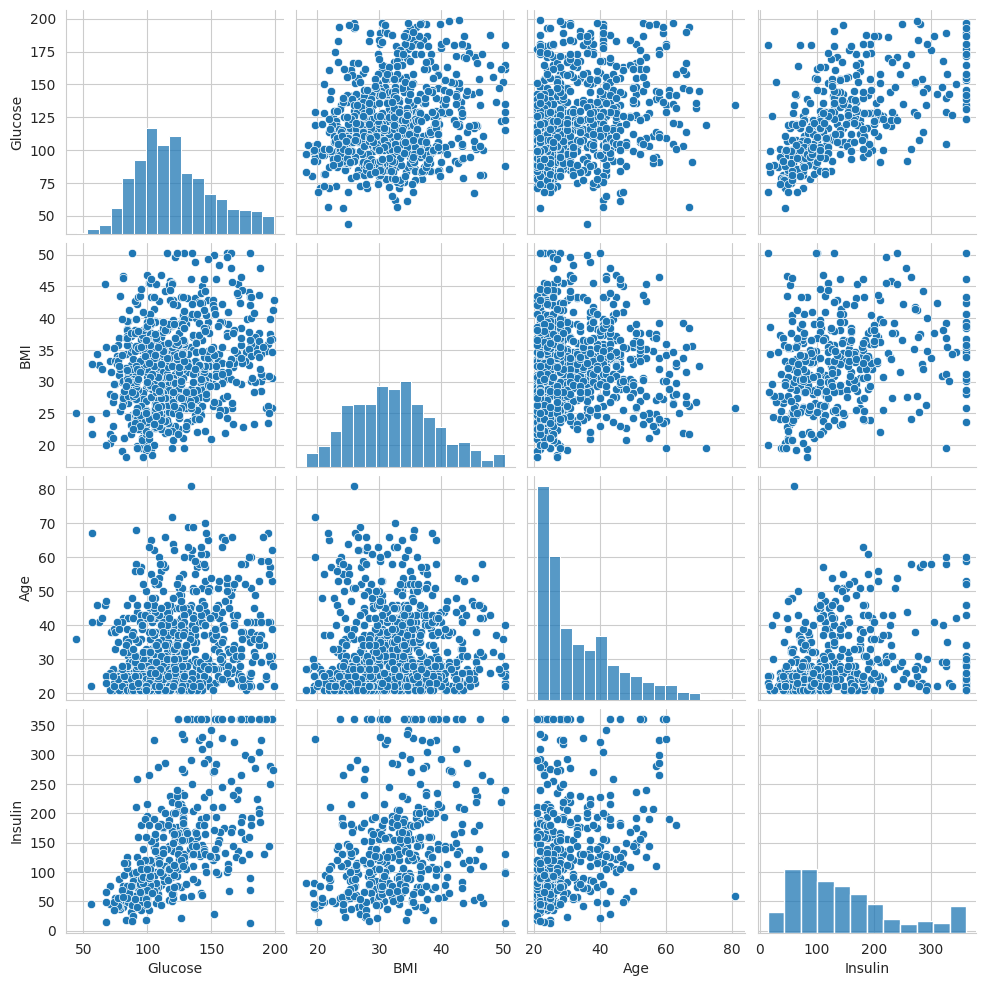

In [41]:

columns_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']
sns.pairplot(df[columns_to_plot])
plt.show()



**Q10: Heatmap for Correlation Matrix**
Generate a heatmap of the correlation matrix of the dataset.


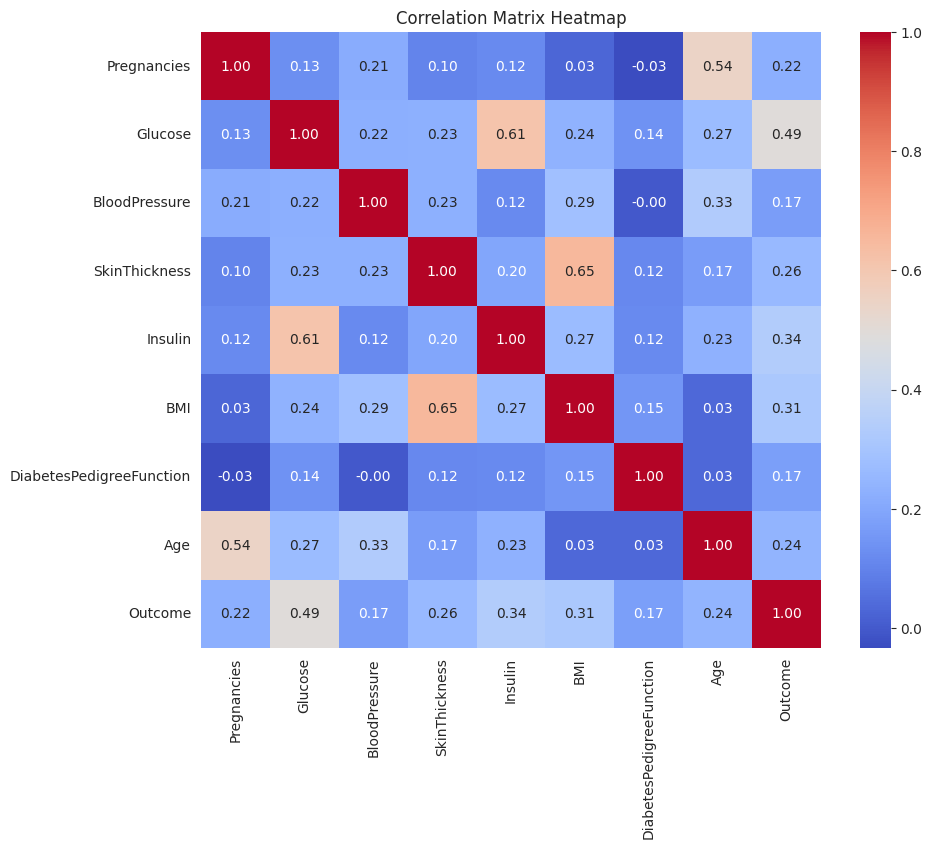

In [44]:
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Part 4: Feature Engineering


**Q11: Creating New Features**
Create a new binary feature named 'HighBMI' where the value is 1 if 'BMI' is above 30. (Tips: you can use 'np.where')


In [ ]:
df['HighBMI'] = np.where(df['BMI'] > 30, 1, 0)


**Q12: Encoding Categorical Variables**
Convert the 'Outcome' column to a categorical variable if it's not already.


In [45]:
df['Outcome'] = df['Outcome'].astype('category')

## Part 5: Model Building


**Q13: Data Splitting**
Split the dataset into features (`X`) and the target variable (`y`), and into training and test sets (test size: 30%, random state:42)


In [46]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


**Q14: Feature Scaling**
Scale the features using `StandardScaler`.


In [48]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Q14.1** Explain why feature scaling is particularly important in logistic regression. Discuss how the performance and convergence of the logistic regression algorithm can be affected if the features are not scaled? What does 'SandardScaler' do?

<font color='red'>Your Answer Here</font>

why feature scaling is important: logistic regression often uses optiimization algorithms like Gradient Descent to find the optimal weights. Features on different scales can cause uneven steps during gradient descent, slowing down convergence or causing it to oscillate before converging.

The performance of logistic regression model may degrade. It is becuase the model may give undue iportance to certain features for their larger scales.
The optimzation algorithm may take longer to converge or may not converge at all if the features are on vastly different scales. This can manifest as slow convergence or the algorithm failing to find the optimal weights.

The "StandardScaler" in scikit-learn is used for standardization. It transofrms the data such that its distrubtion has a mean of 0 and a standard deviation of 1. It standardizes deatures by subtracting the mean and dividing by the standard deviation for each feature independently. This transformation ensures that the features are centered around zero and have similar scales. It helps improve logistic regression algorithm performance.

## Part 6: Model Training and Evaluation


**Q15: Training the Logistic Regression Model**
Train a logistic regression model and fit it to the scaled training data.


In [50]:
import warnings
warnings.filterwarnings("ignore")


**Q16: Making Predictions**
Use the trained model to make predictions on the test set.


In [59]:
X_test_imputed = imputer.transform(X_test)

# Now, make predictions using the trained logistic regression model
predictions = model.predict(X_test_imputed)
# Calculate True Negatives (TN), False Positives (FP), False Negatives (FN), True Positives (TP)
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

# Print the accuracy of the model on the testing set.
print("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))

This model got an accuracy of 74.03% on the testing set



**Q17: Model Evaluation**
Evaluate the model's performance using accuracy and the confusion matrix.


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'predictions' contain the predicted values and 'y_test' is the true target values

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.74
Confusion Matrix:
[[124  27]
 [ 33  47]]


**Q17.1:** Given the output of the model's accuracy and confusion matrix, analyze the balance between the types of errors made by the classifier. In a medical context, how might the consequences of false positives compare to false negatives for a condition like diabetes? Based on the confusion matrix, suggest one strategy to improve the model if reducing false negatives is a higher priority

<font color='red'>Your Answer Here</font>

Given the Accuracy and confusion Matrix. The accracy demonstrates that the model correctly predicts around 74% of the instances in the est set. The true positive is 47, the true nagetives is 124, the false positive is 27 and the false negative is 33. The false positive (TP) shows that the model prediced 27 cases as positive (diabetes), but they were actually negative. The false nagative shows that the model predicted 33 cases as negative (non-diabetes), but they were actually positive.

In the medical context like diagosing diabetes. The false positive mean the model predicted someone has diabetes when they actually don't. In a medical context, this might lead to unnecessary treatments, medications, or stress for patients who are healthy. However, in the case of diabetes, false positives might have fewer severe consequences compared to false negatives.
The false negative means the model predicted someone doesn't have diabetes when they actually do. In a medical context, this could lead to undiagnosed cases, potentially delaying necessary treatments or lifestyle changes, which could worsen the condition or lead to complications.

If reducing false negative is a higher priority. One strategy is recommended. The strategy is to improve the model's performance, especially in reducing false negatives, could be adjusting the classification threshold. By lowering the threshold (from the default 0.5 to a lower value), the model becomes more sensitive, potentially classifying more instances as positive, thereby reducing false negatives at the expense of potentially increasing false positives.

## Part 7: Model Optimization


**Q18: Hyperparameter Tuning with Grid Search:**
Set up a grid search to optimize the 'C' parameter of the logistic regression model.


In [ ]:
# Scale the features after handling missing values
X_scaled = scaler.fit_transform(X_imputed)
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

# Initialize the best model and parameters
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

# Loop over the grid of parameters
for C in [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]:
    for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag']:
        # Set up the model with the current set of parameters
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0

        # Perform K-Fold cross-validation
        for train_idx, test_idx in kfold.split(X):
            # Split the data and scale the features
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Train the model and make predictions
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)

            # Calculate the accuracy for the current fold
            TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)
            accuracy[np_idx] = ACC * 100
            np_idx += 1

        # Update the best model and parameters if the current model is better
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C': C, 'solver': solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

# Print the best parameters and the corresponding score
print("The optimal logistic regression model uses C={}, and a {} solver, achieving a cross-validation accuracy of {}% with a standard deviation of {}%.".format(best_params['C'], best_params['solver'], round(best_accuracy, 3), round(best_std, 3)))



**Q19: Finding the Best Parameters**
After the grid search, report the best parameters and corresponding accuracy.


In [ ]:

print("The optimal logistic regression model uses C={}, and a {} solver, achieving a cross-validation accuracy of {}% with a standard deviation of {}%.".format(best_params['C'], best_params['solver'], round(best_accuracy, 3), round(best_std, 3)))


**Q19.1:** How does the 'C' parameter in logistic regression influence the model's complexity, and why is it important to find an optimal value for 'C' using techniques like grid search? Discuss how the choice of 'C' can impact the balance between bias and variance in the model's performance.

<font color='red'>Your Answer Here</font>

In logistic regression, the 'C' parameter controls the strength of regularization: smaller 'C' values imply stronger regularization, favoring simpler models, while larger 'C' values relax regularization, allowing for more complex models.

Smaller 'C' values encourage simpler models by penalizing large coefficients, preventing overfitting but potentially increasing bias.
Larger 'C' values lead to more complex models that might fit the training data closely, risking overfitting and potentially increasing variance.

Techniques like grid search explore various 'C' values to find the one that optimizes the model's performance on unseen data.
The goal is to strike a balance: avoiding a model that is too simple (high bias) or too complex (high variance).

The tradeoff between bias and variance:samller C, higher bias, lower variance (simpler models)
Larger C, lower bias, higher variance (more complex models)

The choice of 'C' is crucial to prevent underfitting or overfitting. Grid search helps select the 'C' value that achieves the best compromise between bias and variance.

## Part 8: Conclusion and Discussion


**Q20: Model Interpretation**
Interpret the coefficients of the logistic regression model.


In [ ]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients and their corresponding feature names
coefficients = logreg.coef_[0]  # Assuming a single class logistic regression
feature_names = X_train.columns  # Assuming your features are in a DataFrame

# Pair feature names with coefficients and print them
feature_coefficients = dict(zip(feature_names, coefficients))
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Printing coefficients
coefficients = logreg.coef_
print("Coefficients:", coefficients)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit a tree-based model (Random Forest or Gradient Boosting)
forest = RandomForestClassifier()  # or GradientBoostingClassifier()
forest.fit(X_train, y_train)

# Printing feature importance
feature_importance = forest.feature_importances_
print("Feature Importance:", feature_importance)


**Q20.1:**Given the array of coefficients for the logistic regression model, describe how each feature's coefficient affects the probability of the positive class in the model. Which features are most influential in predicting the outcome, and how do you interpret the positive and negative signs of the coefficients?

<font color='red'>Your Answer Here</font>
In logistic regression, positive coefficients increase the likelihood of the positive class as their corresponding features increase.Negative coefficients decrease the likelihood of the positive class with increasing feature values.Larger absolute coefficients indicate stronger influence on predicting the outcome.Features with larger absolute coefficients are more influential in predicting the outcome, with the sign indicating the direction of their impact on the probability of the positive class.




**Q21: Model Performance Discussion**
Discuss the model's performance and its potential real-world implications.


<font color='red'>Your Answer Here</font>
The model's accuracy stands at 74%, indicating a reasonable predictive ability. However, it misclassifies some cases, especially in identifying individuals with diabetes. This could delay necessary interventions or cause unnecessary concern for some. Improving its sensitivity, especially in healthcare, might be crucial for timely diagnoses and interventions, balancing the risks of missed cases with avoiding false alarms.the real-world implications of model performance, particularly in healthcare, revolve around the potential impact on individual health outcomes, resource allocation, and the overall well-being of patients. A model's ability to correctly identify conditions or risks significantly influences patient care and resource utilization.




**Q22: Model Improvement Suggestions:**
Propose ways to improve the model or the modeling process.


<font color='red'>Your Answer Here</font>

suggestion 1: Feature engineering: Explore additional relevant features or transform existing ones to capture more nuanced relationships.

suggestion 2: optimize Thresholds: Adjust classification thresholds to prioritize sensitivity (reducing false negatives) or specificity based on domain-specific needs.

suggestion 3: Ensemble Methods: Experiment with ensemble techniques or more complex models to enhance predictive performance.

suggestion 4: Hyperparameter Tuning: Fine-tune model hyperparameters to achieve better generalization and improve predictive accuracy.